## 1. The most Nobel of Prizes
<p><img style="float: right;margin:5px 20px 5px 1px; max-width:250px" src="https://assets.datacamp.com/production/project_441/img/Nobel_Prize.png"></p>
<p>The Nobel Prize is perhaps the world's most well known scientific award. Except for the honor, prestige and substantial prize money the recipient also gets a gold medal showing Alfred Nobel (1833 - 1896) who established the prize. Every year it's given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. The first Nobel Prize was handed out in 1901, and at that time the Prize was very Eurocentric and male-focused, but nowadays it's not biased in any way whatsoever. Surely. Right?</p>
<p>Well, we're going to find out! The Nobel Foundation has made a dataset available of all prize winners from the start of the prize, in 1901, to 2016. Let's load it in and take a look.</p>

In [294]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np



# Reading in the Nobel Prize data
nobel = pd.read_csv('datasets/nobel.csv')

# Taking a look at the first several winners
nobel.head(6)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany


## 2. So, who gets the Nobel Prize?
<p>Just looking at the first couple of prize winners, or Nobel laureates as they are also called, we already see a celebrity: Wilhelm Conrad Röntgen, the guy who discovered X-rays. And actually, we see that all of the winners in 1901 were guys that came from Europe. But that was back in 1901, looking at all winners in the dataset, from 1901 to 2016, which sex and which country is the most commonly represented? </p>
<p>(For <em>country</em>, we will use the <code>birth_country</code> of the winner, as the <code>organization_country</code> is <code>NaN</code> for all shared Nobel Prizes.)</p>

In [296]:
# Display the number of (possibly shared) Nobel Prizes handed
# out between 1901 and 2016
display(len(nobel['prize'].value_counts()))

# Display the number of prizes won by male and female recipients.
display(nobel['sex'].value_counts())

# Display the number of prizes won by the top 10 nationalities.
nobel['birth_country'].value_counts().head(10)

579

Male      836
Female     49
Name: sex, dtype: int64

United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Netherlands                  18
Canada                       18
Russia                       17
Italy                        17
Name: birth_country, dtype: int64

## 3. USA dominance
<p>Not so surprising perhaps: the most common Nobel laureate between 1901 and 2016 was a man born in the United States of America. But in 1901 all the winners were European. When did the USA start to dominate the Nobel Prize charts?</p>

In [298]:
# Calculating the proportion of USA born winners per decade
nobel['usa_born_winner'] = nobel['birth_country']=="United States of America"
nobel['decade'] = (np.floor(nobel['year'] /10)*10).astype(int)
prop_usa_winners = nobel.groupby('decade', as_index=False)['usa_born_winner'].mean()

# Display the proportions of USA born winners per decade
display(prop_usa_winners)

,decade,usa_born_winner
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846


## 4. USA dominance, visualized
<p>A table is OK, but to <em>see</em> when the USA started to dominate the Nobel charts we need a plot!</p>

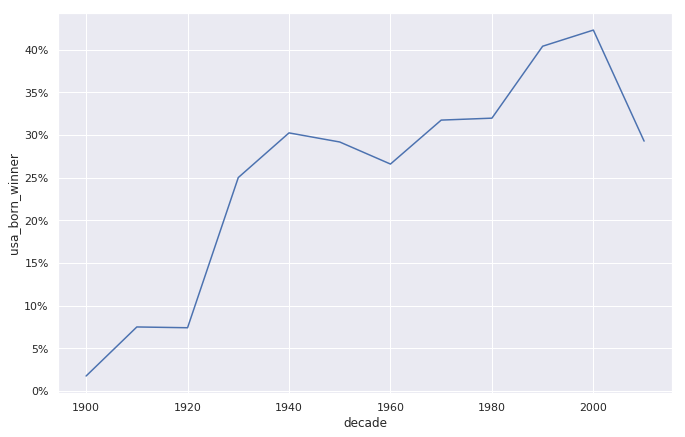

In [300]:
# Setting the plotting theme
sns.set()
# and setting the size of all plots.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [11, 7]

# Plotting USA born winners 
ax = sns.lineplot(x='decade', y='usa_born_winner', data=prop_usa_winners)

# Adding %-formatting to the y-axis
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter(1,0))

## 5. What is the gender of a typical Nobel Prize winner?
<p>So the USA became the dominating winner of the Nobel Prize first in the 1930s and had kept the leading position ever since. But one group that was in the lead from the start, and never seems to let go, are <em>men</em>. Maybe it shouldn't come as a shock that there is some imbalance between how many male and female prize winners there are, but how significant is this imbalance? And is it better or worse within specific prize categories like physics, medicine, literature, etc.?</p>

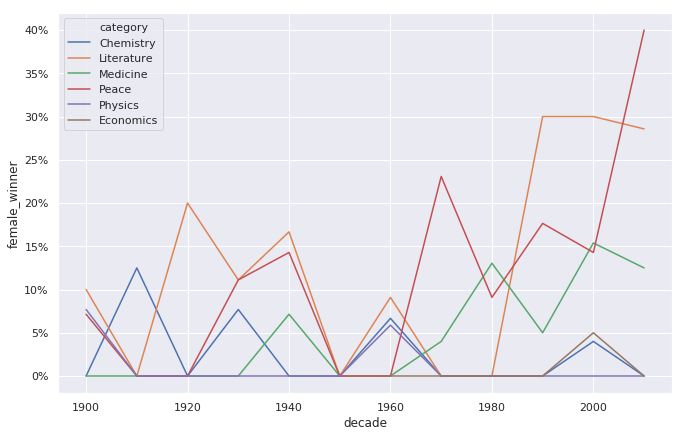

In [302]:
# Calculating the proportion of female laureates per decade
nobel['female_winner'] = nobel['sex'] == 'Female'
prop_female_winners = nobel.groupby(['decade','category'], as_index=False)['female_winner'].mean()

# Plotting USA born winners with % winners on the y-axis
# Setting the plotting theme
sns.set()
# and setting the size of all plots.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [11, 7]

# Plotting USA born winners '
ax = sns.lineplot(x='decade', y='female_winner', data=prop_female_winners, hue='category')

# Adding %-formatting to the y-axis
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter(1,0))

## 6. The first woman to win the Nobel Prize
<p>The plot above is a bit messy as the lines are overplotting. But it does show some interesting trends and patterns. Overall the imbalance is pretty large with physics, economics, and chemistry having the largest imbalance. Medicine has a somewhat positive trend, and since the 1990s the literature prize is also now more balanced. The big outlier is the peace prize during the 2010s, but keep in mind that this just covers the years 2010 to 2016.</p>
<p>Given this imbalance, who was the first woman to receive a Nobel Prize? And in what category?</p>

In [304]:
# Picking out the first woman to win a Nobel Prize
nobel[nobel.sex == 'Female'].nsmallest(1,'year')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True


## 7. Repeat laureates
<p>For most scientists/writers/activists a Nobel Prize would be the crowning achievement of a long career. But for some people, one is just not enough, and few have gotten it more than once. Who are these lucky few? (Having won no Nobel Prize myself, I'll assume it's just about luck.)</p>

In [306]:
# Selecting the laureates that have received 2 or more prizes.
nobel.groupby('full_name').filter(lambda group: len(group)>=2)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,True
62,1911,Chemistry,The Nobel Prize in Chemistry 1911,"""in recognition of her services to the advance...",1/1,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,Female,Sorbonne University,Paris,France,1934-07-04,Sallanches,France,False,1910,True
89,1917,Peace,The Nobel Peace Prize 1917,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1910,False
215,1944,Peace,The Nobel Peace Prize 1944,NaN,1/1,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1940,False
278,1954,Chemistry,The Nobel Prize in Chemistry 1954,"""for his research into the nature of the chemi...",1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1950,False
283,1954,Peace,The Nobel Peace Prize 1954,NaN,1/1,515,Organization,Office of the United Nations High Commissioner...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1950,False
298,1956,Physics,The Nobel Prize in Physics 1956,"""for their researches on semiconductors and th...",1/3,66,Individual,John Bardeen,1908-05-23,"Madison, WI",...,Male,University of Illinois,"Urbana, IL",United States of America,1991-01-30,"Boston, MA",United States of America,True,1950,False
306,1958,Chemistry,The Nobel Prize in Chemistry 1958,"""for his work on the structure of proteins, es...",1/1,222,Individual,Frederick Sanger,1918-08-13,Rendcombe,...,Male,University of Cambridge,Cambridge,United Kingdom,2013-11-19,Cambridge,United Kingdom,False,1950,False
340,1962,Peace,The Nobel Peace Prize 1962,NaN,1/1,217,Individual,Linus Carl Pauling,1901-02-28,"Portland, OR",...,Male,California Institute of Technology (Caltech),"Pasadena, CA",United States of America,1994-08-19,"Big Sur, CA",United States of America,True,1960,False
348,1963,Peace,The Nobel Peace Prize 1963,NaN,1/2,482,Organization,Comité international de la Croix Rouge (Intern...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,1960,False


## 8. How old are you when you get the prize?
<p>The list of repeat winners contains some illustrious names! We again meet Marie Curie, who got the prize in physics for discovering radiation and in chemistry for isolating radium and polonium. John Bardeen got it twice in physics for transistors and superconductivity, Frederick Sanger got it twice in chemistry, and Linus Carl Pauling got it first in chemistry and later in peace for his work in promoting nuclear disarmament. We also learn that organizations also get the prize as both the Red Cross and the UNHCR have gotten it twice.</p>
<p>But how old are you generally when you get the prize?</p>

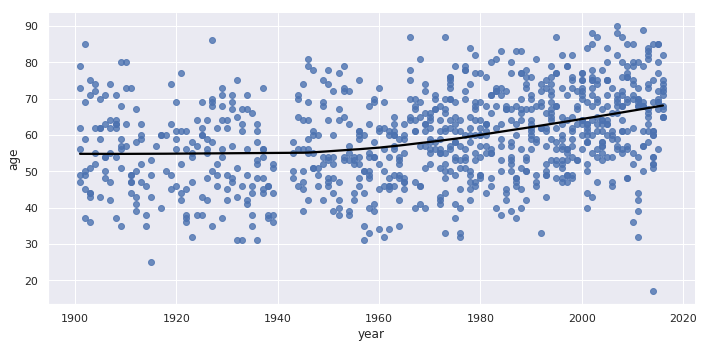

In [308]:
# Converting birth_date from String to datetime
nobel['birth_date'] = pd.to_datetime(nobel['birth_date'])

# Calculating the age of Nobel Prize winners
nobel['age'] = nobel['year'] - nobel['birth_date'].dt.year

# Plotting the age of Nobel Prize winners
sns.lmplot(x='year',y='age', data=nobel, lowess=True, aspect=2, line_kws={'color': 'black'})

## 9. Age differences between prize categories
<p>The plot above shows us a lot! We see that people use to be around 55 when they received the price, but nowadays the average is closer to 65. But there is a large spread in the laureates' ages, and while most are 50+, some are very young.</p>
<p>We also see that the density of points is much high nowadays than in the early 1900s -- nowadays many more of the prizes are shared, and so there are many more winners. We also see that there was a disruption in awarded prizes around the Second World War (1939 - 1945). </p>
<p>Let's look at age trends within different prize categories.</p>

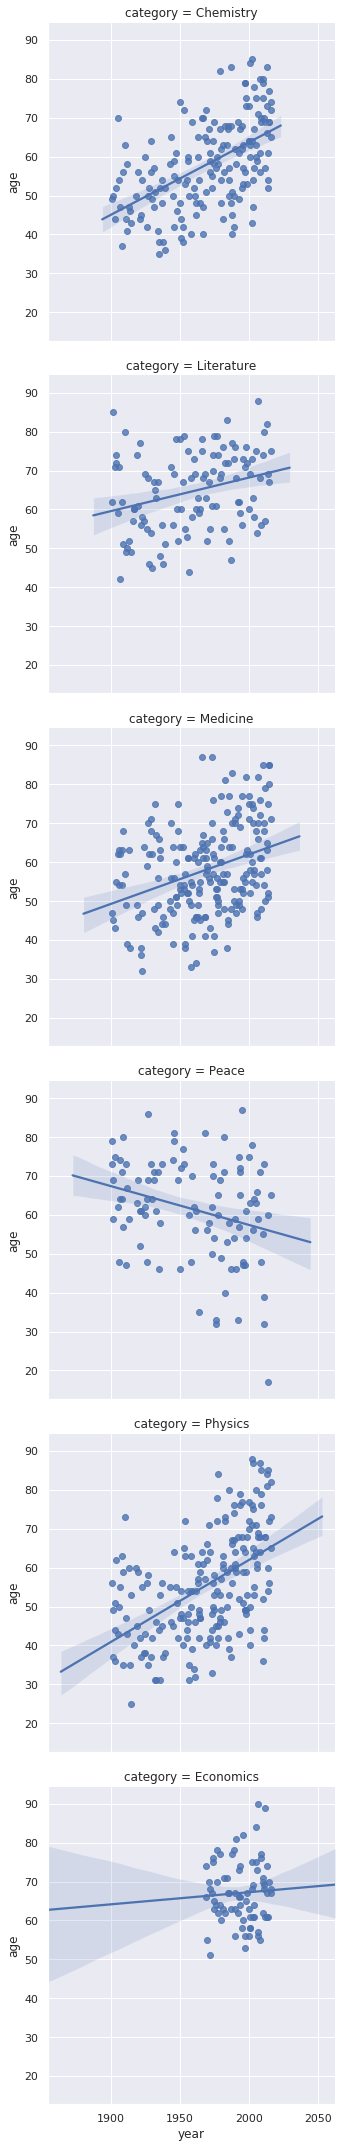

In [310]:
# Same plot as above, but separate plots for each type of Nobel Prize
sns.lmplot(x='year', y='age', data=nobel, row='category')

## 10. Oldest and youngest winners
<p>More plots with lots of exciting stuff going on! We see that both winners of the chemistry, medicine, and physics prize have gotten older over time. The trend is strongest for physics: the average age used to be below 50, and now it's almost 70. Literature and economics are more stable. We also see that economics is a newer category. But peace shows an opposite trend where winners are getting younger! </p>
<p>In the peace category we also a winner around 2010 that seems exceptionally young. This begs the questions, who are the oldest and youngest people ever to have won a Nobel Prize?</p>

In [312]:
# The oldest winner of a Nobel Prize as of 2016
display(nobel.nlargest(1,'age'))
# The youngest winner of a Nobel Prize as of 2016
nobel.nsmallest(1,'age')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,age
793,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",1/3,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,...,University of Minnesota,"Minneapolis, MN",United States of America,2008-06-24,"Minneapolis, MN",United States of America,False,2000,False,90.0


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female_winner,age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,...,NaN,NaN,NaN,NaN,NaN,NaN,False,2010,True,17.0


## 11. You get a prize!
<p><img style="float: right;margin:20px 20px 20px 20px; max-width:200px" src="https://assets.datacamp.com/production/project_441/img/paint_nobel_prize.png"></p>
<p>Hey! You get a prize for making it to the very end of this notebook! It might not be a Nobel Prize, but I made it myself in paint so it should count for something. But don't despair, Leonid Hurwicz was 90 years old when he got his prize, so it might not be too late for you. Who knows.</p>
<p>Before you leave, what was again the name of the youngest winner ever who in 2014 got the prize for "[her] struggle against the suppression of children and young people and for the right of all children to education"?</p>

In [314]:
# The name of the youngest winner of the Nobel Prize as of 2016
youngest_winner = nobel[nobel.full_name].nsmallest(1,'age')

KeyError: '["Jacobus Henricus van \'t Hoff" \'Sully Prudhomme\' \'Emil Adolf von Behring\'\n \'Jean Henry Dunant\' \'Frédéric Passy\' \'Wilhelm Conrad Röntgen\'\n \'Hermann Emil Fischer\' \'Christian Matthias Theodor Mommsen\' \'Ronald Ross\'\n \'Élie Ducommun\' \'Charles Albert Gobat\' \'Hendrik Antoon Lorentz\'\n \'Pieter Zeeman\' \'Svante August Arrhenius\'\n \'Bjørnstjerne Martinus Bjørnson\' \'Niels Ryberg Finsen\'\n \'William Randal Cremer\' \'Antoine Henri Becquerel\' \'Pierre Curie\'\n \'Marie Curie, née Sklodowska\' \'Sir William Ramsay\' \'Frédéric Mistral\'\n \'José Echegaray y Eizaguirre\' \'Ivan Petrovich Pavlov\'\n \'Institut de droit international (Institute of International Law)\'\n \'Lord Rayleigh (John William Strutt)\'\n \'Johann Friedrich Wilhelm Adolf von Baeyer\' \'Henryk Sienkiewicz\'\n \'Robert Koch\'\n \'Baroness Bertha Sophie Felicita von Suttner, née Countess Kinsky von Chinic und Tettau\'\n \'Philipp Eduard Anton von Lenard\' \'Henri Moissan\' \'Giosuè Carducci\'\n \'Camillo Golgi\' \'Santiago Ramón y Cajal\' \'Theodore Roosevelt\'\n \'Joseph John Thomson\' \'Eduard Buchner\' \'Rudyard Kipling\'\n \'Charles Louis Alphonse Laveran\' \'Ernesto Teodoro Moneta\' \'Louis Renault\'\n \'Albert Abraham Michelson\' \'Ernest Rutherford\' \'Rudolf Christoph Eucken\'\n \'Ilya Ilyich Mechnikov\' \'Paul Ehrlich\' \'Klas Pontus Arnoldson\'\n \'Fredrik Bajer\' \'Gabriel Lippmann\' \'Wilhelm Ostwald\'\n \'Selma Ottilia Lovisa Lagerlöf\' \'Emil Theodor Kocher\'\n \'Auguste Marie François Beernaert\'\n "Paul Henri Benjamin Balluet d\'Estournelles de Constant, Baron de Constant de Rebecque"\n \'Guglielmo Marconi\' \'Karl Ferdinand Braun\' \'Otto Wallach\'\n \'Paul Johann Ludwig Heyse\' \'Albrecht Kossel\'\n \'Bureau international permanent de la Paix (Permanent International Peace Bureau)\'\n \'Johannes Diderik van der Waals\' \'Marie Curie, née Sklodowska\'\n \'Count Maurice (Mooris) Polidore Marie Bernhard Maeterlinck\'\n \'Allvar Gullstrand\' \'Tobias Michael Carel Asser\' \'Alfred Hermann Fried\'\n \'Wilhelm Wien\' \'Victor Grignard\' \'Paul Sabatier\'\n \'Gerhart Johann Robert Hauptmann\' \'Alexis Carrel\' \'Elihu Root\'\n \'Nils Gustaf Dalén\' \'Alfred Werner\' \'Rabindranath Tagore\'\n \'Charles Robert Richet\' \'Henri La Fontaine\' \'Heike Kamerlingh Onnes\'\n \'Theodore William Richards\' \'Robert Bárány\' \'Max von Laue\'\n \'Richard Martin Willstätter\' \'Romain Rolland\' \'Sir William Henry Bragg\'\n \'William Lawrence Bragg\' \'Carl Gustaf Verner von Heidenstam\'\n \'Karl Adolph Gjellerup\' \'Henrik Pontoppidan\'\n \'Comité international de la Croix Rouge (International Committee of the Red Cross)\'\n \'Charles Glover Barkla\' \'Fritz Haber\' \'Max Karl Ernst Ludwig Planck\'\n \'Carl Friedrich Georg Spitteler\' \'Jules Bordet\' \'Thomas Woodrow Wilson\'\n \'Johannes Stark\' \'Walther Hermann Nernst\' \'Knut Pedersen Hamsun\'\n \'Schack August Steenberg Krogh\' \'Léon Victor Auguste Bourgeois\'\n \'Charles Edouard Guillaume\' \'Frederick Soddy\' \'Anatole France\'\n \'Karl Hjalmar Branting\' \'Christian Lous Lange\' \'Albert Einstein\'\n \'Francis William Aston\' \'Jacinto Benavente\' \'Archibald Vivian Hill\'\n \'Otto Fritz Meyerhof\' \'Fridtjof Nansen\' \'Niels Henrik David Bohr\'\n \'Fritz Pregl\' \'William Butler Yeats\' \'Frederick Grant Banting\'\n \'John James Rickard Macleod\' \'Robert Andrews Millikan\'\n \'Wladyslaw Stanislaw Reymont\' \'Willem Einthoven\'\n \'Karl Manne Georg Siegbahn\' \'Richard Adolf Zsigmondy\'\n \'George Bernard Shaw\' \'Sir Austen Chamberlain\' \'Charles Gates Dawes\'\n \'James Franck\' \'Gustav Ludwig Hertz\' \'The (Theodor) Svedberg\'\n \'Grazia Deledda\' \'Johannes Andreas Grib Fibiger\' \'Aristide Briand\'\n \'Gustav Stresemann\' \'Jean Baptiste Perrin\' \'Heinrich Otto Wieland\'\n \'Henri Bergson\' \'Julius Wagner-Jauregg\' \'Ferdinand Buisson\'\n \'Ludwig Quidde\' \'Arthur Holly Compton\' \'Charles Thomson Rees Wilson\'\n \'Adolf Otto Reinhold Windaus\' \'Sigrid Undset\'\n \'Charles Jules Henri Nicolle\' \'Owen Willans Richardson\' \'Arthur Harden\'\n \'Hans Karl August Simon von Euler-Chelpin\' \'Thomas Mann\'\n \'Christiaan Eijkman\' \'Sir Frederick Gowland Hopkins\'\n \'Frank Billings Kellogg\' \'Prince Louis-Victor Pierre Raymond de Broglie\'\n \'Hans Fischer\' \'Sinclair Lewis\' \'Karl Landsteiner\'\n \'Lars Olof Jonathan (Nathan) Söderblom\'\n \'Sir Chandrasekhara Venkata Raman\' \'Carl Bosch\' \'Friedrich Bergius\'\n \'Erik Axel Karlfeldt\' \'Otto Heinrich Warburg\' \'Jane Addams\'\n \'Nicholas Murray Butler\' \'Irving Langmuir\' \'John Galsworthy\'\n \'Sir Charles Scott Sherrington\' \'Edgar Douglas Adrian\'\n \'Werner Karl Heisenberg\' \'Ivan Alekseyevich Bunin\' \'Thomas Hunt Morgan\'\n \'Sir Norman Angell (Ralph Lane)\' \'Erwin Schrödinger\'\n \'Paul Adrien Maurice Dirac\' \'Harold Clayton Urey\' \'Luigi Pirandello\'\n \'George Hoyt Whipple\' \'George Richards Minot\' \'William Parry Murphy\'\n \'Arthur Henderson\' \'Frédéric Joliot\' \'Irène Joliot-Curie\' \'Hans Spemann\'\n \'Carl von Ossietzky\' \'James Chadwick\'\n \'Petrus (Peter) Josephus Wilhelmus Debye\' "Eugene Gladstone O\'Neill"\n \'Sir Henry Hallett Dale\' \'Otto Loewi\' \'Carlos Saavedra Lamas\'\n \'Victor Franz Hess\' \'Carl David Anderson\' \'Walter Norman Haworth\'\n \'Paul Karrer\' \'Roger Martin du Gard\'\n \'Albert von Szent-Györgyi Nagyrápolt\'\n \'Cecil of Chelwood, Viscount (Lord Edgar Algernon Robert Gascoyne Cecil)\'\n \'Clinton Joseph Davisson\' \'George Paget Thomson\' \'Richard Kuhn\'\n \'Pearl Buck\' \'Corneille Jean François Heymans\'\n \'Office international Nansen pour les Réfugiés (Nansen International Office for Refugees)\'\n \'Enrico Fermi\' \'Adolf Friedrich Johann Butenandt\' \'Leopold Ruzicka\'\n \'Frans Eemil Sillanpää\' \'Gerhard Domagk\' \'Ernest Orlando Lawrence\'\n \'George de Hevesy\' \'Henrik Carl Peter Dam\' \'Edward Adelbert Doisy\'\n \'Otto Stern\' \'Otto Hahn\' \'Johannes Vilhelm Jensen\' \'Joseph Erlanger\'\n \'Herbert Spencer Gasser\'\n \'Comité international de la Croix Rouge (International Committee of the Red Cross)\'\n \'Isidor Isaac Rabi\' \'Artturi Ilmari Virtanen\' \'Gabriela Mistral\'\n \'Sir Alexander Fleming\' \'Ernst Boris Chain\' \'Sir Howard Walter Florey\'\n \'Cordell Hull\' \'Wolfgang Pauli\' \'James Batcheller Sumner\'\n \'John Howard Northrop\' \'Wendell Meredith Stanley\' \'Hermann Hesse\'\n \'Hermann Joseph Muller\' \'Emily Greene Balch\' \'John Raleigh Mott\'\n \'Percy Williams Bridgman\' \'Sir Robert Robinson\'\n \'André Paul Guillaume Gide\' \'Carl Ferdinand Cori\'\n \'Gerty Theresa Cori, née Radnitz\' \'Bernardo Alberto Houssay\'\n \'Friends Service Council (The Quakers)\'\n \'American Friends Service Committee (The Quakers)\'\n \'Sir Edward Victor Appleton\' \'Arne Wilhelm Kaurin Tiselius\'\n \'Thomas Stearns Eliot\' \'Paul Hermann Müller\'\n \'Patrick Maynard Stuart Blackett\' \'William Francis Giauque\'\n \'William Faulkner\' \'Walter Rudolf Hess\'\n \'Antonio Caetano de Abreu Freire Egas Moniz\'\n \'Lord (John) Boyd Orr of Brechin\' \'Hideki Yukawa\'\n \'Otto Paul Hermann Diels\' \'Kurt Alder\'\n \'Earl (Bertrand Arthur William) Russell\' \'Edward Calvin Kendall\'\n \'Tadeus Reichstein\' \'Philip Showalter Hench\' \'Ralph Bunche\'\n \'Cecil Frank Powell\' \'Edwin Mattison McMillan\' \'Glenn Theodore Seaborg\'\n \'Pär Fabian Lagerkvist\' \'Max Theiler\' \'Léon Jouhaux\'\n \'Sir John Douglas Cockcroft\' \'Ernest Thomas Sinton Walton\'\n \'Archer John Porter Martin\' \'Richard Laurence Millington Synge\'\n \'François Mauriac\' \'Selman Abraham Waksman\' \'Albert Schweitzer\'\n \'Felix Bloch\' \'Edward Mills Purcell\' \'Hermann Staudinger\'\n \'Sir Winston Leonard Spencer Churchill\' \'Hans Adolf Krebs\'\n \'Fritz Albert Lipmann\' \'George Catlett Marshall\' \'Frits Zernike\'\n \'Linus Carl Pauling\' \'Ernest Miller Hemingway\' \'John Franklin Enders\'\n \'Thomas Huckle Weller\' \'Frederick Chapman Robbins\'\n \'Office of the United Nations High Commissioner for Refugees (UNHCR)\'\n \'Max Born\' \'Walther Bothe\' \'Vincent du Vigneaud\' \'Halldór Kiljan Laxness\'\n \'Axel Hugo Theodor Theorell\' \'Willis Eugene Lamb\' \'Polykarp Kusch\'\n \'Sir Cyril Norman Hinshelwood\' \'Nikolay Nikolaevich Semenov\'\n \'Juan Ramón Jiménez\' \'André Frédéric Cournand\' \'Werner Forssmann\'\n \'Dickinson W. Richards\' \'William Bradford Shockley\' \'John Bardeen\'\n \'Walter Houser Brattain\' \'Lord (Alexander R.) Todd\' \'Albert Camus\'\n \'Daniel Bovet\' \'Lester Bowles Pearson\' \'Chen Ning Yang\'\n \'Tsung-Dao (T.D.) Lee\' \'Frederick Sanger\' \'Boris Leonidovich Pasternak\'\n \'George Wells Beadle\' \'Edward Lawrie Tatum\' \'Joshua Lederberg\'\n \'Georges Pire\' \'Pavel Alekseyevich Cherenkov\' \'Igor Yevgenyevich Tamm\'\n \'Il´ja Mikhailovich Frank\' \'Jaroslav Heyrovsky\' \'Salvatore Quasimodo\'\n \'Severo Ochoa\' \'Arthur Kornberg\' \'Philip J. Noel-Baker\'\n \'Emilio Gino Segrè\' \'Owen Chamberlain\' \'Willard Frank Libby\'\n \'Saint-John Perse\' \'Sir Frank Macfarlane Burnet\' \'Peter Brian Medawar\'\n \'Albert John Lutuli\' \'Donald Arthur Glaser\' \'Melvin Calvin\' \'Ivo Andric\'\n \'Georg von Békésy\' \'Dag Hjalmar Agne Carl Hammarskjöld\'\n \'Robert Hofstadter\' \'Rudolf Ludwig Mössbauer\' \'Max Ferdinand Perutz\'\n \'John Cowdery Kendrew\' \'John Steinbeck\' \'Francis Harry Compton Crick\'\n \'James Dewey Watson\' \'Maurice Hugh Frederick Wilkins\'\n \'Linus Carl Pauling\' \'Lev Davidovich Landau\' \'Karl Ziegler\'\n \'Giulio Natta\' \'Giorgos Seferis\' \'Sir John Carew Eccles\'\n \'Alan Lloyd Hodgkin\' \'Andrew Fielding Huxley\'\n \'Comité international de la Croix Rouge (International Committee of the Red Cross)\'\n \'Ligue des Sociétés de la Croix-Rouge (League of Red Cross Societies)\'\n \'Eugene Paul Wigner\' \'Maria Goeppert Mayer\' \'J. Hans D. Jensen\'\n \'Dorothy Crowfoot Hodgkin\' \'Jean-Paul Sartre\' \'Konrad Bloch\'\n \'Feodor Lynen\' \'Martin Luther King Jr.\' \'Charles Hard Townes\'\n \'Nicolay Gennadiyevich Basov\' \'Aleksandr Mikhailovich Prokhorov\'\n \'Robert Burns Woodward\' \'Mikhail Aleksandrovich Sholokhov\'\n \'François Jacob\' \'André Lwoff\' \'Jacques Monod\'\n "United Nations Children\'s Fund (UNICEF)" \'Sin-Itiro Tomonaga\'\n \'Julian Schwinger\' \'Richard P. Feynman\' \'Robert S. Mulliken\'\n \'Shmuel Yosef Agnon\' \'Nelly Sachs\' \'Peyton Rous\'\n \'Charles Brenton Huggins\' \'Alfred Kastler\' \'Manfred Eigen\'\n \'Ronald George Wreyford Norrish\' \'George Porter\' \'Miguel Angel Asturias\'\n \'Ragnar Granit\' \'Haldan Keffer Hartline\' \'George Wald\'\n \'Hans Albrecht Bethe\' \'Lars Onsager\' \'Yasunari Kawabata\'\n \'Robert W. Holley\' \'Har Gobind Khorana\' \'Marshall W. Nirenberg\'\n \'René Cassin\' \'Luis Walter Alvarez\' \'Derek H. R. Barton\' \'Odd Hassel\'\n \'Ragnar Frisch\' \'Jan Tinbergen\' \'Samuel Beckett\' \'Max Delbrück\'\n \'Alfred D. Hershey\' \'Salvador E. Luria\'\n \'International Labour Organization (I.L.O.)\' \'Murray Gell-Mann\'\n \'Luis F. Leloir\' \'Paul A. Samuelson\' \'Aleksandr Isayevich Solzhenitsyn\'\n \'Sir Bernard Katz\' \'Ulf von Euler\' \'Julius Axelrod\' \'Norman E. Borlaug\'\n \'Hannes Olof Gösta Alfvén\' \'Louis Eugène Félix Néel\' \'Gerhard Herzberg\'\n \'Simon Kuznets\' \'Pablo Neruda\' \'Earl W. Sutherland, Jr.\' \'Willy Brandt\'\n \'Dennis Gabor\' \'Christian B. Anfinsen\' \'Stanford Moore\'\n \'William H. Stein\' \'John R. Hicks\' \'Kenneth J. Arrow\' \'Heinrich Böll\'\n \'Gerald M. Edelman\' \'Rodney R. Porter\' \'John Bardeen\' \'Leon Neil Cooper\'\n \'John Robert Schrieffer\' \'Ernst Otto Fischer\' \'Geoffrey Wilkinson\'\n \'Wassily Leontief\' \'Patrick White\' \'Karl von Frisch\' \'Konrad Lorenz\'\n \'Nikolaas Tinbergen\' \'Henry A. Kissinger\' \'Le Duc Tho\' \'Leo Esaki\'\n \'Ivar Giaever\' \'Brian David Josephson\' \'Paul J. Flory\' \'Gunnar Myrdal\'\n \'Friedrich August von Hayek\' \'Eyvind Johnson\' \'Harry Martinson\'\n \'Albert Claude\' \'Christian de Duve\' \'George E. Palade\' \'Seán MacBride\'\n \'Eisaku Sato\' \'Sir Martin Ryle\' \'Antony Hewish\' \'John Warcup Cornforth\'\n \'Vladimir Prelog\' \'Leonid Vitaliyevich Kantorovich\'\n \'Tjalling C. Koopmans\' \'Eugenio Montale\' \'David Baltimore\'\n \'Renato Dulbecco\' \'Howard Martin Temin\' \'Andrei Dmitrievich Sakharov\'\n \'Aage Niels Bohr\' \'Ben Roy Mottelson\' \'Leo James Rainwater\'\n \'William N. Lipscomb\' \'Milton Friedman\' \'Saul Bellow\'\n \'Baruch S. Blumberg\' \'D. Carleton Gajdusek\' \'Betty Williams\'\n \'Mairead Corrigan\' \'Burton Richter\' \'Samuel Chao Chung Ting\'\n \'Ilya Prigogine\' \'Bertil Ohlin\' \'James E. Meade\' \'Vicente Aleixandre\'\n \'Roger Guillemin\' \'Andrew V. Schally\' \'Rosalyn Yalow\'\n \'Amnesty International\' \'Philip Warren Anderson\'\n \'Sir Nevill Francis Mott\' \'John Hasbrouck van Vleck\' \'Peter D. Mitchell\'\n \'Herbert A. Simon\' \'Isaac Bashevis Singer\' \'Werner Arber\'\n \'Daniel Nathans\' \'Hamilton O. Smith\' \'Mohamed Anwar al-Sadat\'\n \'Menachem Begin\' \'Pyotr Leonidovich Kapitsa\' \'Arno Allan Penzias\'\n \'Robert Woodrow Wilson\' \'Herbert C. Brown\' \'Georg Wittig\'\n \'Theodore W. Schultz\' \'Sir Arthur Lewis\' \'Odysseus Elytis\'\n \'Allan M. Cormack\' \'Godfrey N. Hounsfield\' \'Mother Teresa\'\n \'Sheldon Lee Glashow\' \'Abdus Salam\' \'Steven Weinberg\' \'Frederick Sanger\'\n \'Paul Berg\' \'Walter Gilbert\' \'Lawrence R. Klein\' \'Czeslaw Milosz\'\n \'Baruj Benacerraf\' \'Jean Dausset\' \'George D. Snell\'\n \'Adolfo Pérez Esquivel\' \'James Watson Cronin\' \'Val Logsdon Fitch\'\n \'Kenichi Fukui\' \'Roald Hoffmann\' \'James Tobin\' \'Elias Canetti\'\n \'Roger W. Sperry\' \'David H. Hubel\' \'Torsten N. Wiesel\'\n \'Office of the United Nations High Commissioner for Refugees (UNHCR)\'\n \'Nicolaas Bloembergen\' \'Arthur Leonard Schawlow\' \'Kai M. Siegbahn\'\n \'Aaron Klug\' \'George J. Stigler\' \'Gabriel García Márquez\'\n \'Sune K. Bergström\' \'Bengt I. Samuelsson\' \'John R. Vane\' \'Alva Myrdal\'\n \'Alfonso García Robles\' \'Kenneth G. Wilson\' \'Henry Taube\' \'Gerard Debreu\'\n \'William Golding\' \'Barbara McClintock\' \'Lech Walesa\'\n \'Subramanyan Chandrasekhar\' \'William Alfred Fowler\'\n \'Robert Bruce Merrifield\' \'Richard Stone\' \'Jaroslav Seifert\'\n \'Niels K. Jerne\' \'Georges J.F. Köhler\' \'César Milstein\'\n \'Desmond Mpilo Tutu\' \'Carlo Rubbia\' \'Simon van der Meer\'\n \'Herbert A. Hauptman\' \'Jerome Karle\' \'Franco Modigliani\' \'Claude Simon\'\n \'Michael S. Brown\' \'Joseph L. Goldstein\'\n \'International Physicians for the Prevention of Nuclear War\'\n \'Klaus von Klitzing\' \'Dudley R. Herschbach\' \'Yuan T. Lee\'\n \'John C. Polanyi\' \'James M. Buchanan Jr.\' \'Wole Soyinka\' \'Stanley Cohen\'\n \'Rita Levi-Montalcini\' \'Elie Wiesel\' \'Ernst Ruska\' \'Gerd Binnig\'\n \'Heinrich Rohrer\' \'Donald J. Cram\' \'Jean-Marie Lehn\'\n \'Charles J. Pedersen\' \'Robert M. Solow\' \'Joseph Brodsky\'\n \'Susumu Tonegawa\' \'Oscar Arias Sánchez\' \'J. Georg Bednorz\'\n \'K. Alexander Müller\' \'Johann Deisenhofer\' \'Robert Huber\'\n \'Hartmut Michel\' \'Maurice Allais\' \'Naguib Mahfouz\' \'Sir James W. Black\'\n \'Gertrude B. Elion\' \'George H. Hitchings\'\n \'United Nations Peacekeeping Forces\' \'Leon M. Lederman\' \'Melvin Schwartz\'\n \'Jack Steinberger\' \'Sidney Altman\' \'Thomas R. Cech\' \'Trygve Haavelmo\'\n \'Camilo José Cela\' \'J. Michael Bishop\' \'Harold E. Varmus\'\n \'The 14th Dalai Lama (Tenzin Gyatso)\' \'Norman F. Ramsey\'\n \'Hans G. Dehmelt\' \'Wolfgang Paul\' \'Elias James Corey\'\n \'Harry M. Markowitz\' \'Merton H. Miller\' \'William F. Sharpe\' \'Octavio Paz\'\n \'Joseph E. Murray\' \'E. Donnall Thomas\' \'Mikhail Sergeyevich Gorbachev\'\n \'Jerome I. Friedman\' \'Henry W. Kendall\' \'Richard E. Taylor\'\n \'Richard R. Ernst\' \'Ronald H. Coase\' \'Nadine Gordimer\' \'Erwin Neher\'\n \'Bert Sakmann\' \'Aung San Suu Kyi\' \'Pierre-Gilles de Gennes\'\n \'Rudolph A. Marcus\' \'Gary S. Becker\' \'Derek Walcott\' \'Edmond H. Fischer\'\n \'Edwin G. Krebs\' \'Rigoberta Menchú Tum\' \'Georges Charpak\'\n \'Kary B. Mullis\' \'Michael Smith\' \'Robert W. Fogel\' \'Douglass C. North\'\n \'Toni Morrison\' \'Richard J. Roberts\' \'Phillip A. Sharp\' \'Nelson Mandela\'\n \'Frederik Willem de Klerk\' \'Russell A. Hulse\' \'Joseph H. Taylor Jr.\'\n \'George A. Olah\' \'John C. Harsanyi\' \'John F. Nash Jr.\' \'Reinhard Selten\'\n \'Kenzaburo Oe\' \'Alfred G. Gilman\' \'Martin Rodbell\' \'Yasser Arafat\'\n \'Shimon Peres\' \'Yitzhak Rabin\' \'Bertram N. Brockhouse\'\n \'Clifford G. Shull\' \'Paul J. Crutzen\' \'Mario J. Molina\'\n \'F. Sherwood Rowland\' \'Robert E. Lucas Jr.\' \'Seamus Heaney\'\n \'Edward B. Lewis\' \'Christiane Nüsslein-Volhard\' \'Eric F. Wieschaus\'\n \'Joseph Rotblat\' \'Pugwash Conferences on Science and World Affairs\'\n \'Martin L. Perl\' \'Frederick Reines\' \'Robert F. Curl Jr.\'\n \'Sir Harold W. Kroto\' \'Richard E. Smalley\' \'James A. Mirrlees\'\n \'William Vickrey\' \'Wislawa Szymborska\' \'Peter C. Doherty\'\n \'Rolf M. Zinkernagel\' \'Carlos Filipe Ximenes Belo\' \'José Ramos-Horta\'\n \'David M. Lee\' \'Douglas D. Osheroff\' \'Robert C. Richardson\'\n \'Paul D. Boyer\' \'John E. Walker\' \'Jens C. Skou\' \'Robert C. Merton\'\n \'Myron S. Scholes\' \'Dario Fo\' \'Stanley B. Prusiner\'\n \'International Campaign to Ban Landmines (ICBL)\' \'Jody Williams\'\n \'Steven Chu\' \'Claude Cohen-Tannoudji\' \'William D. Phillips\' \'Walter Kohn\'\n \'John A. Pople\' \'Amartya Sen\' \'José Saramago\' \'Robert F. Furchgott\'\n \'Louis J. Ignarro\' \'Ferid Murad\' \'John Hume\' \'David Trimble\'\n \'Robert B. Laughlin\' \'Horst L. Störmer\' \'Daniel C. Tsui\'\n \'Ahmed H. Zewail\' \'Robert A. Mundell\' \'Günter Grass\' \'Günter Blobel\'\n \'Médecins Sans Frontières\' "Gerardus \'t Hooft" \'Martinus J.G. Veltman\'\n \'Alan J. Heeger\' \'Alan G. MacDiarmid\' \'Hideki Shirakawa\'\n \'James J. Heckman\' \'Daniel L. McFadden\' \'Gao Xingjian\' \'Arvid Carlsson\'\n \'Paul Greengard\' \'Eric R. Kandel\' \'Kim Dae-jung\' \'Zhores I. Alferov\'\n \'Herbert Kroemer\' \'Jack S. Kilby\' \'William S. Knowles\' \'Ryoji Noyori\'\n \'K. Barry Sharpless\' \'George A. Akerlof\' \'A. Michael Spence\'\n \'Joseph E. Stiglitz\' \'Sir Vidiadhar Surajprasad Naipaul\'\n \'Leland H. Hartwell\' \'Tim Hunt\' \'Sir Paul M. Nurse\'\n \'United Nations (U.N.)\' \'Kofi Annan\' \'Eric A. Cornell\'\n \'Wolfgang Ketterle\' \'Carl E. Wieman\' \'John B. Fenn\' \'Koichi Tanaka\'\n \'Kurt Wüthrich\' \'Daniel Kahneman\' \'Vernon L. Smith\' \'Imre Kertész\'\n \'Sydney Brenner\' \'H. Robert Horvitz\' \'John E. Sulston\' \'Jimmy Carter\'\n \'Raymond Davis Jr.\' \'Masatoshi Koshiba\' \'Riccardo Giacconi\' \'Peter Agre\'\n \'Roderick MacKinnon\' \'Robert F. Engle III\' \'Clive W.J. Granger\'\n \'John M. Coetzee\' \'Paul C. Lauterbur\' \'Sir Peter Mansfield\'\n \'Shirin Ebadi\' \'Alexei A. Abrikosov\' \'Vitaly L. Ginzburg\'\n \'Anthony J. Leggett\' \'Aaron Ciechanover\' \'Avram Hershko\' \'Irwin Rose\'\n \'Finn E. Kydland\' \'Edward C. Prescott\' \'Elfriede Jelinek\' \'Richard Axel\'\n \'Linda B. Buck\' \'Wangari Muta Maathai\' \'David J. Gross\'\n \'H. David Politzer\' \'Frank Wilczek\' \'Yves Chauvin\' \'Robert H. Grubbs\'\n \'Richard R. Schrock\' \'Robert J. Aumann\' \'Thomas C. Schelling\'\n \'Harold Pinter\' \'Barry J. Marshall\' \'J. Robin Warren\'\n \'International Atomic Energy Agency (IAEA)\' \'Mohamed ElBaradei\'\n \'Roy J. Glauber\' \'John L. Hall\' \'Theodor W. Hänsch\' \'Roger D. Kornberg\'\n \'Edmund S. Phelps\' \'Orhan Pamuk\' \'Andrew Z. Fire\' \'Craig C. Mello\'\n \'Muhammad Yunus\' \'Grameen Bank\' \'John C. Mather\' \'George F. Smoot\'\n \'Gerhard Ertl\' \'Leonid Hurwicz\' \'Eric S. Maskin\' \'Roger B. Myerson\'\n \'Doris Lessing\' \'Mario R. Capecchi\' \'Sir Martin J. Evans\'\n \'Oliver Smithies\' \'Intergovernmental Panel on Climate Change (IPCC)\'\n \'Albert Arnold (Al) Gore Jr.\' \'Albert Fert\' \'Peter Grünberg\'\n \'Osamu Shimomura\' \'Martin Chalfie\' \'Roger Y. Tsien\' \'Paul Krugman\'\n \'Jean-Marie Gustave Le Clézio\' \'Harald zur Hausen\'\n \'Françoise Barré-Sinoussi\' \'Luc Montagnier\' \'Martti Ahtisaari\'\n \'Yoichiro Nambu\' \'Makoto Kobayashi\' \'Toshihide Maskawa\'\n \'Venkatraman Ramakrishnan\' \'Thomas A. Steitz\' \'Ada E. Yonath\'\n \'Elinor Ostrom\' \'Oliver E. Williamson\' \'Herta Müller\'\n \'Elizabeth H. Blackburn\' \'Carol W. Greider\' \'Jack W. Szostak\'\n \'Barack H. Obama\' \'Charles Kuen Kao\' \'Willard S. Boyle\' \'George E. Smith\'\n \'Richard F. Heck\' \'Ei-ichi Negishi\' \'Akira Suzuki\' \'Peter A. Diamond\'\n \'Dale T. Mortensen\' \'Christopher A. Pissarides\' \'Mario Vargas Llosa\'\n \'Robert G. Edwards\' \'Liu Xiaobo\' \'Andre Geim\' \'Konstantin Novoselov\'\n \'Dan Shechtman\' \'Thomas J. Sargent\' \'Christopher A. Sims\'\n \'Tomas Tranströmer\' \'Bruce A. Beutler\' \'Jules A. Hoffmann\'\n \'Ralph M. Steinman\' \'Ellen Johnson Sirleaf\' \'Leymah Gbowee\'\n \'Tawakkol Karman\' \'Saul Perlmutter\' \'Brian P. Schmidt\' \'Adam G. Riess\'\n \'Robert J. Lefkowitz\' \'Brian K. Kobilka\' \'Alvin E. Roth\'\n \'Lloyd S. Shapley\' \'Mo Yan\' \'Sir John B. Gurdon\' \'Shinya Yamanaka\'\n \'European Union (EU)\' \'Serge Haroche\' \'David J. Wineland\'\n \'Martin Karplus\' \'Michael Levitt\' \'Arieh Warshel\' \'Eugene F. Fama\'\n \'Lars Peter Hansen\' \'Robert J. Shiller\' \'Alice Munro\' \'James E. Rothman\'\n \'Randy W. Schekman\' \'Thomas C. Südhof\'\n \'Organisation for the Prohibition of Chemical Weapons (OPCW)\'\n \'François Englert\' \'Peter W. Higgs\' \'Eric Betzig\' \'Stefan W. Hell\'\n \'William E. Moerner\' \'Jean Tirole\' \'Patrick Modiano\' "John O\'Keefe"\n \'May-Britt Moser\' \'Edvard I. Moser\' \'Kailash Satyarthi\'\n \'Malala Yousafzai\' \'Isamu Akasaki\' \'Hiroshi Amano\' \'Shuji Nakamura\'\n \'Tomas Lindahl\' \'Paul Modrich\' \'Aziz Sancar\' \'Angus Deaton\'\n \'Svetlana Alexievich\' \'William C. Campbell\' \'Satoshi Ōmura\' \'Youyou Tu\'\n \'National Dialogue Quartet\' \'Takaaki Kajita\' \'Arthur B. McDonald\'\n \'Jean-Pierre Sauvage\' \'Sir J. Fraser Stoddart\' \'Bernard L. Feringa\'\n \'Oliver Hart\' \'Bengt Holmström\' \'Bob Dylan\' \'Yoshinori Ohsumi\'\n \'Juan Manuel Santos\' \'David J. Thouless\' \'F. Duncan M. Haldane\'\n \'J. Michael Kosterlitz\'] not in index'